## I. Importing Libraries and Pulling Dataset into the Notebook

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading data and working on it (tabular and numerical)

import pandas as pd
import numpy as np

# Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# statemodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build logistic regression model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to import different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [3]:
# Loading the survey into out notebook
mhdata = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

## II. EDA and Data Preparation

In [4]:
# Checking the dimensions of our data
mhdata.shape

(1259, 27)

We have 27 columns and 1,259 entries from the survey

In [5]:
# Taking a peak at the first five entries in our dataset
mhdata.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
# Checking for data types of each attribute
mhdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

It seems that all attributes are objects based on the nature of the data. This is correct but this will be hard to work a model on. This will be explained later on.

### Attribute Information

**Timestamp** - date and time the survey was taken <br>
**Age** - age of the surveyee <br>
**Gender** - gender of surveyee <br>
**Country** - the country which the surveyee resides and works in <br>
**State** - which state in the US (if the answer to the country attribute is currently in the US) <br>
**self_employed** - Self-employed? <br> 
**family_history** - family history of mental illness present? <br>
**treatment** - sought treatment for a mental health condition? <br>
**work_interfere** - does mental health condition (if any) interfere with work? <br>
**no_employees** - Number of employees at work? <br>
**remote_work** - work remotely more than 50% of workshift? <br>
**tech_company** - Is the company you work in primarily a tech company? <br>
**benefits** - Does your company provide mental health benefits? <br>
**care_options** - Are you aware of the options for mental health treatment that your company provides? <br>
**wellness_program** - Is mental health included in the health wellness program of your company? <br>
**seek_help** - Does your company assist you or give options on how to seek medical help? <br>
**anonymity** - Is your identity protected should you seek medical treatment regarding mental health? <br>
**leave** - Is taking a leave due to mental health easy within your company? <br>
**mental_health_consequence** - Do you feel or think that your company takes it negatively when you talk to them about your mental health condition? <br>
**phys_health_consequence** - Do you feel or think that your company takes it negatively when you talk to them about your physical health condition? <br>
**coworkers** - Are you open to talk about mental health issues with your peers at work? <br>
**supervisor** - Are you open to talk about mental health issues with your supervisor? <br>
**mental_health_interview** - Would you open up about mental health issues with a prospective company during an interview? <br>
**phys_health_interview** - Would you open up about physical health issues with a prospective company during an interview? <br>
**mental_vs_physical** - Do you think that your company's concern for mental health and physical health are of the same weight? <br>
**obs_consequence** - Have you heard of or observed negative feedback at your workplace for a fellow employee with a mental health condition? <br>
**comments** - Additional comments

### Cleaning the Data
We are aware that surveys may not give out the best results for uniformity, so we will take extra steps to clean the data and make it uniform

In [7]:
# Checking for missing values
mhdata.isna().apply(pd.value_counts).T


,False,True
Timestamp,1259.0,NaN
Age,1259.0,NaN
Gender,1259.0,NaN
Country,1259.0,NaN
state,744.0,515.0
self_employed,1241.0,18.0
family_history,1259.0,NaN
treatment,1259.0,NaN
work_interfere,995.0,264.0
no_employees,1259.0,NaN


In [8]:
# Checking for duplicates in the dataset
mhdata.duplicated().any()

False

No duplicated entries are present in the set

In [9]:
# Dropping columns not needed/ not useful for EDA and modeling
mhdata.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

Dropping the following columns:

* **Timestamp** - contains date and time of when the surveyee took the survey; not really useful for analysis
* **Country** - contains information on where the surveyee lives; this would be a useful for a really large dataset with no 1 country dominating more than half of the answers. In our dataset, roughly 59% of the surveyee reside in the USA.
* **state** - contains information on which state in particular the surveyee lives if they ever answered USA in the Country field. Since only the rest of the 41% of the dataset live outside the USA, we have 41% of null values and would not be organic to include this one
* **comments** - an optional field for surveyees to answer: any additional comments they would like to make regarding the survey; this will not be included since we only got 14% surveyees who answered this field. We are also not doing a text analysis.

In [10]:
# Renaming columns for uniformity and ease of understanding. We like uniformity!
mhdata.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History', 
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere', 
           'no_employees': 'Employee_Count_Company', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company', 
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program', 
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave', 
           'mental_health_consequence': 'Mental_Health_Consequence', 
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers_Reach', 
           'supervisor': 'Supervisor_Reach', 'mental_health_interview': 'Mental_Health_Interview', 
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical', 
           'obs_consequence': 'Observed_Consequence_Workplace'} , inplace = True , axis = 1)

In [11]:
# Checking the entries for age
mhdata['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

We have ages that are off (negative and immortal numbers). Let's fix them by imputing.

In [12]:
# calculating the median age
median_age = mhdata['Age'].median()
print(median_age)

31.0


In [13]:
# since some of data are impossible to work with, we will replace impossible values with the median age
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] < 15]], median_age, inplace = True)
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] > 100]], median_age, inplace = True)

mhdata['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

Replacing impossible values with the median age was our call to use instead of np.nan since we want to avoid missing values in our dataset. Using the median age preserves the central tendency of the data and minimizes the impact of outliers. Here, we set a limit to <15 (minimum working age according to International Labor Organization [ILO] standards) and >100 to avoid outliers

In [14]:
# Checking the entries for gender
mhdata['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [15]:
# We will only limit our analysis to three categories
mhdata['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mhdata['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mhdata["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [16]:
mhdata['Gender'].value_counts()

Male      991
Female    247
Queer      21
Name: Gender, dtype: int64

With that fixed, we identify 991 entries from male respondents, 247 entries from female respondents, and 21 entries from queer respondents

In [17]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(mhdata[column].value_counts())
    print() 

Self_Employed:
No     1095
Yes     146
Name: Self_Employed, dtype: int64

Family_History:
No     767
Yes    492
Name: Family_History, dtype: int64

Treatment:
Yes    637
No     622
Name: Treatment, dtype: int64

Work_Interfere:
Sometimes    465
Never        213
Rarely       173
Often        144
Name: Work_Interfere, dtype: int64

Employee_Count_Company:
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: Employee_Count_Company, dtype: int64

Remote_Work:
No     883
Yes    376
Name: Remote_Work, dtype: int64

Tech_Company:
Yes    1031
No      228
Name: Tech_Company, dtype: int64

Benefits:
Yes           477
Don't know    408
No            374
Name: Benefits, dtype: int64

Care_Options:
No          501
Yes         444
Not sure    314
Name: Care_Options, dtype: int64

Wellness_Program:
No            842
Yes           229
Don't know    188
Name: Wellness_Program, dtype: int64

Seek_Help:
No            646

### EDA
#### Target Variable - Treatment

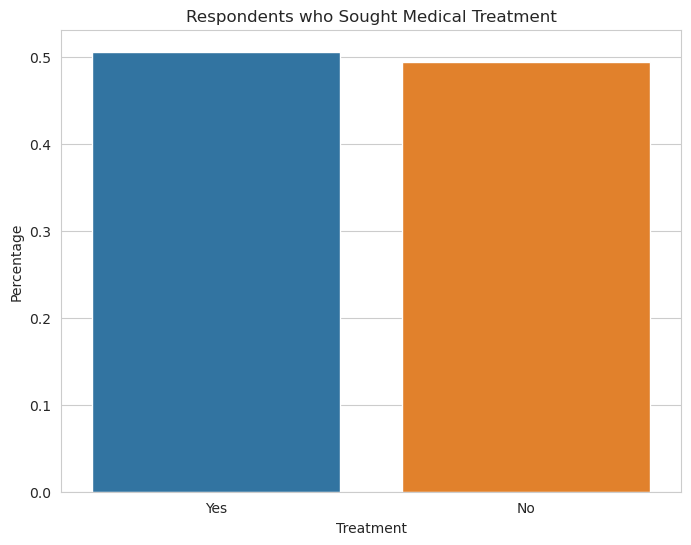

In [18]:
# Chart for whether respondent sought medical treatment or not
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = mhdata['Treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Respondents who Sought Medical Treatment')
plt.show()

#### Respondent Demography with Respect to Target

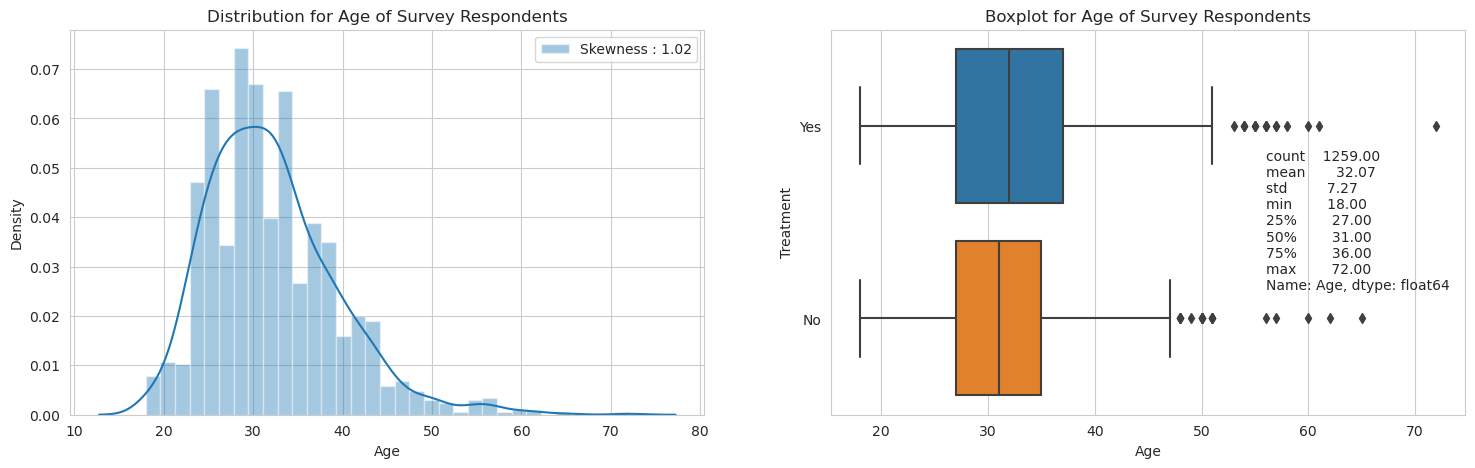

In [19]:
# Chart for Age
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(mhdata['Age'], label = 'Skewness : %.2f'%(mhdata['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "Treatment", data = mhdata)
plt.title('Boxplot for Age of Survey Respondents')
age = str(mhdata['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

Distribution and Boxplot has been called to check the profile of the surveyees.

* Results show that age attribute is skewed to the right. We have the highest age at 72 and lowest at 18, the skewness indicates that majority of the tech employees are the young generations ranging from their 20s to late 30s; assuming mid to senior level positions in the tech industry.
* The boxplot figure presents tech employees that seek medical treatment have much diverse age group, while the group of respondents who did NOT seek medical treatment have a younger range. Both factors are not that significant.

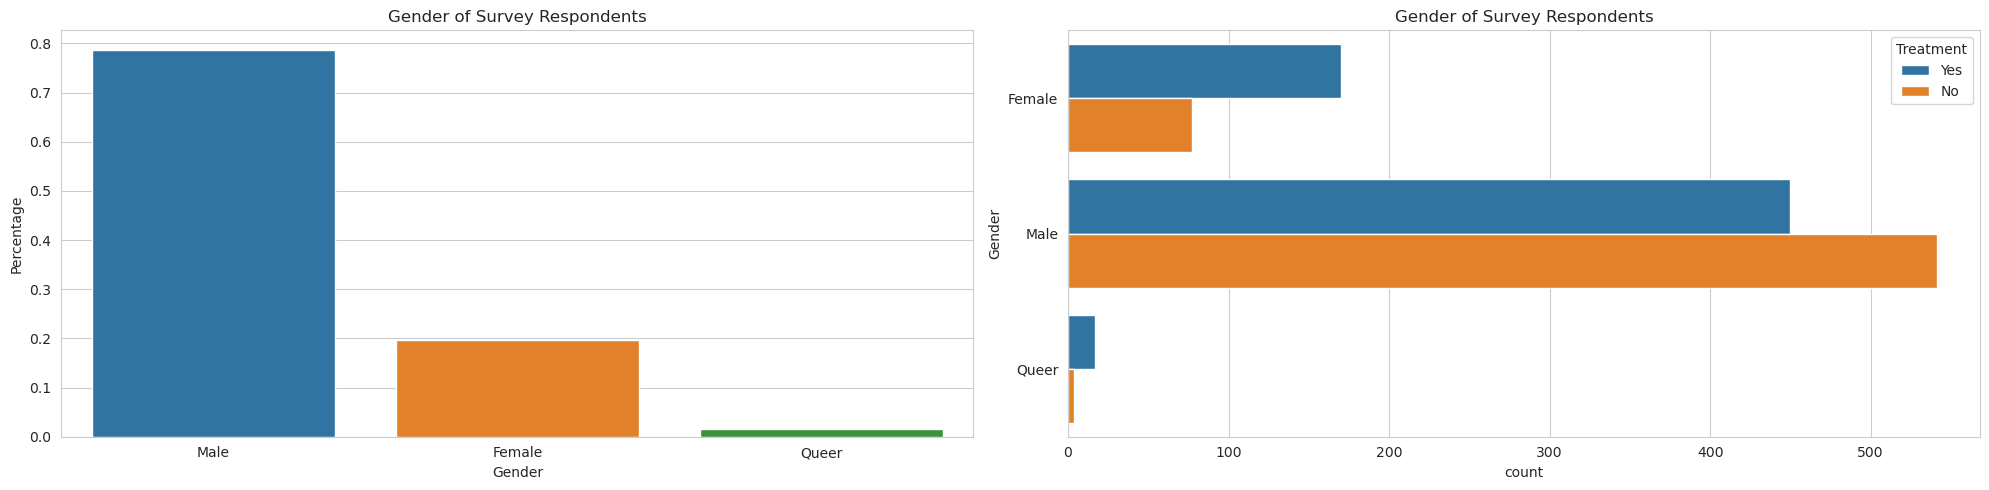

In [20]:
# Chart for Gender
plt.figure(figsize = (20, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = mhdata['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data=eda_percentage.head(10))
plt.title('Gender of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = mhdata['Gender'], hue=mhdata['Treatment'])
plt.title('Gender of Survey Respondents')

plt.tight_layout()
plt.show()

Majority of the surveyees are Male at more than 75%. Male respondents are more likely not to seek medical treatment for mental health compared to other genders.

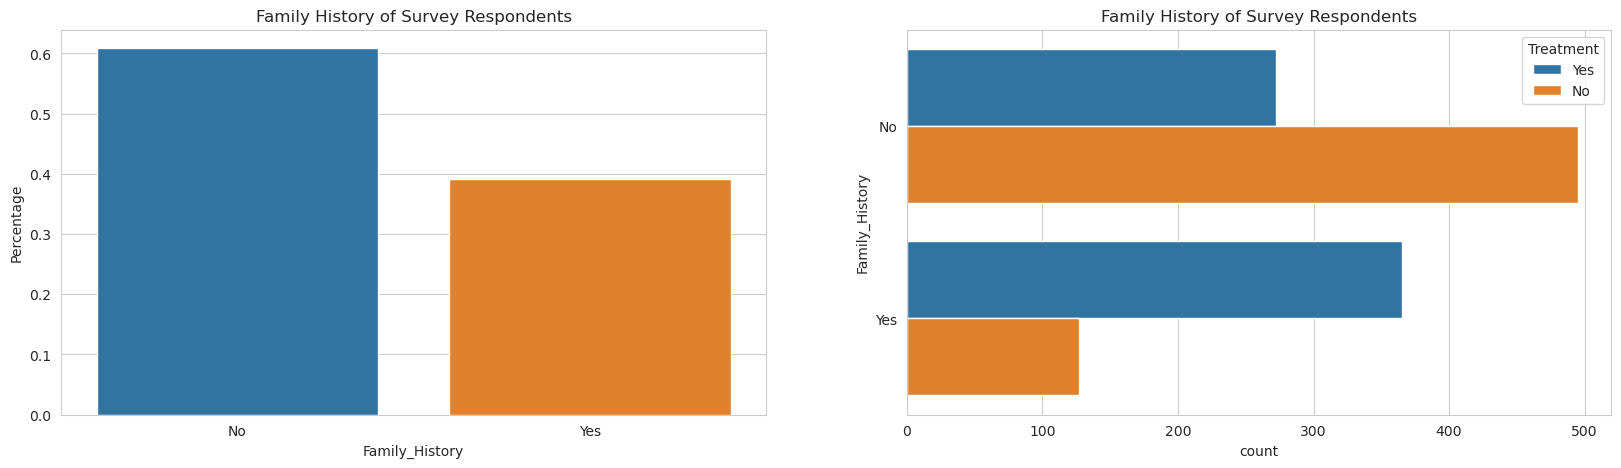

In [21]:
# Chart for Family History
plt.figure(figsize = (20,5))

# Bar plot for Family History distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Family_History'].value_counts(normalize = True).rename_axis('Family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'Family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')

# Count plot for Family History with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Family_History'], hue = mhdata['Treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

Majority of the survey respondents recorded that they don't have a family history of mental health conditions; and respondents who said they have a family history are more likely to seek medical treatment.

#### Working Conditions with Respect to Target

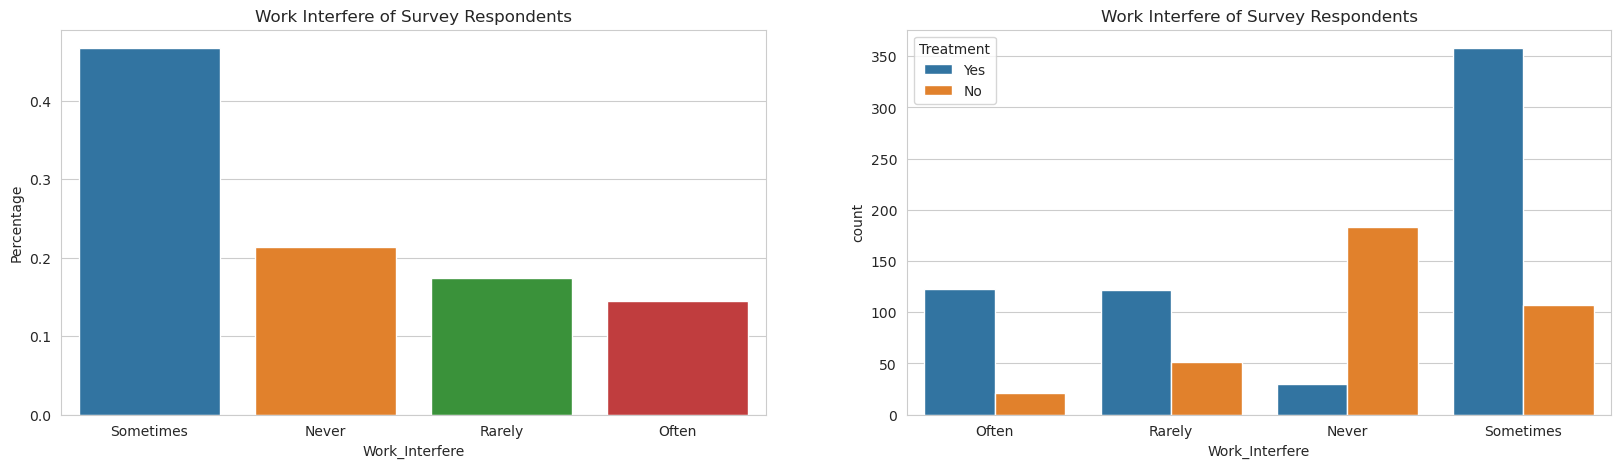

In [22]:
# Chart for Work Interference (of mental health)
plt.figure(figsize = (20,5))

# Bar plot for Work Interference distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Work_Interfere'].value_counts(normalize = True).rename_axis('Work_Interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'Work_Interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

# Count plot for Work Interference with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Work_Interfere'], hue = mhdata['Treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

Survey reveals that more than 40% of the response say that mental health sometimes interfere with work, with more than 10% of the survey say that it affects them often. Around 20% of the answers reveal that mental health does not affect their work. Regardless of the medical and psychological implication of the responses, it is revealed that surveyees who say that mental health does interfere with work at any degree are more likely to seek medical treatment than those who say that it doesn't interfere with their work.

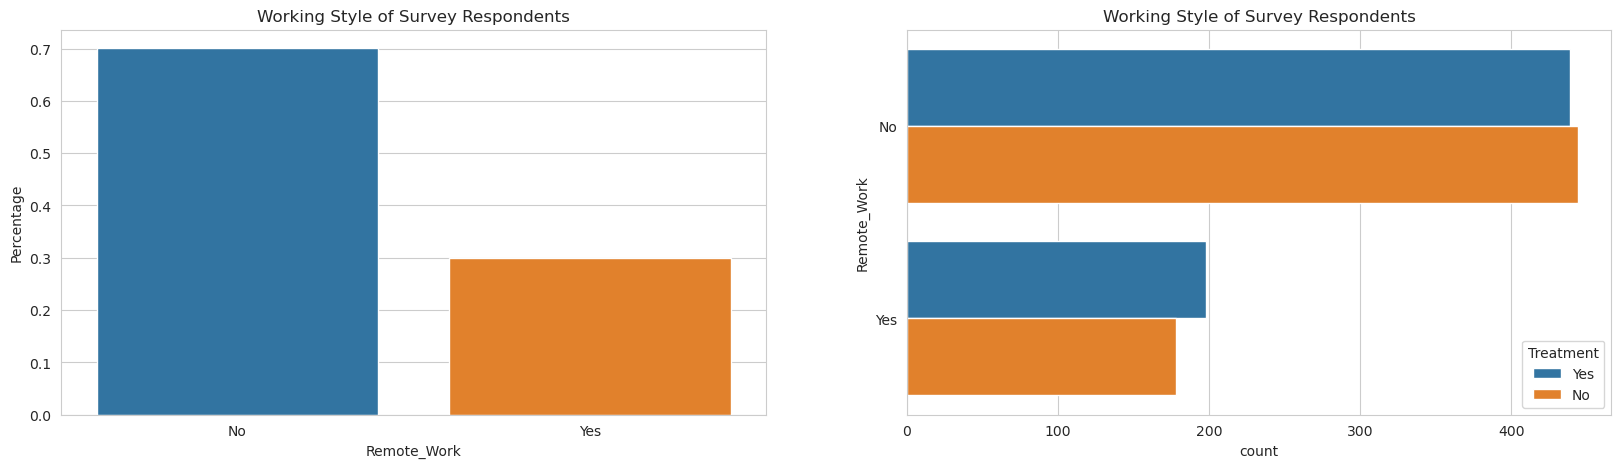

In [23]:
# Same comment as the previous ones. This will be the last comment for EDA
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Remote_Work'].value_counts(normalize = True).rename_axis('Remote_Work').reset_index(name = 'Percentage')
sns.barplot(x = 'Remote_Work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Remote_Work'], hue = mhdata['Treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

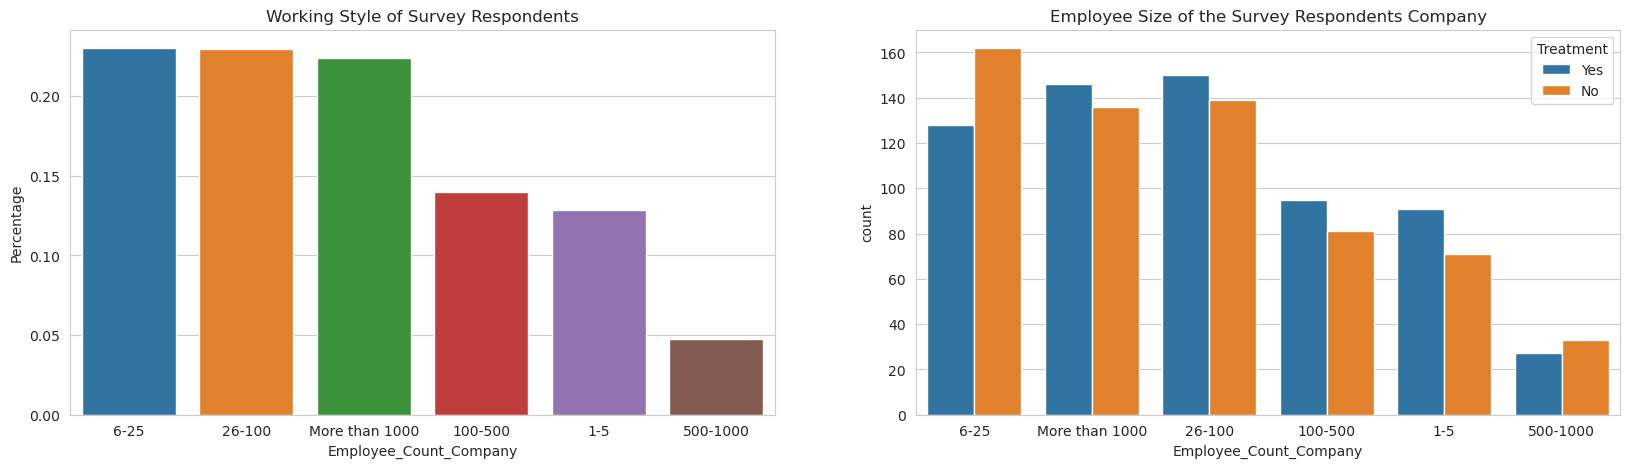

In [24]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Employee_Count_Company'].value_counts(normalize = True).rename_axis('Employee_Count_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Employee_Count_Company', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Employee_Count_Company'], hue = mhdata['Treatment'])
plt.title('Employee Size of the Survey Respondents Company')
plt.show()


There is no significant pattern with regard to employee size of the company where the respondents are working for and getting a treatment.

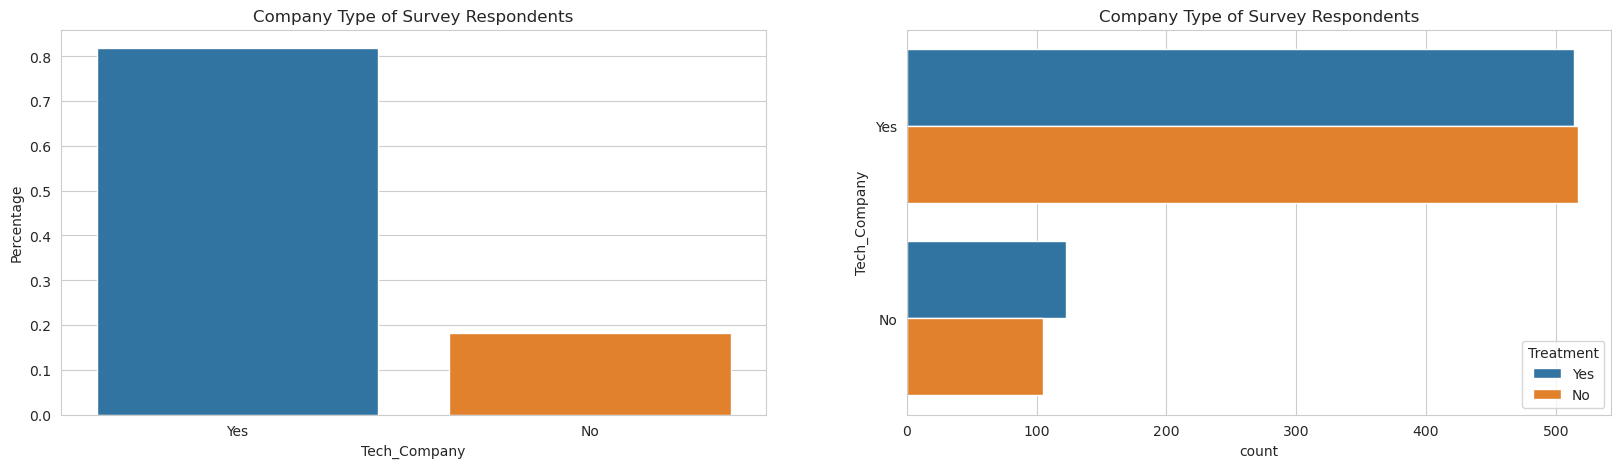

In [25]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Tech_Company'].value_counts(normalize = True).rename_axis('Tech_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Tech_Company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Tech_Company'], hue = mhdata['Treatment'])
plt.title('Company Type of Survey Respondents')
plt.show()

Around 18% of the surveyees reveal that they are not with a company that is primarily in the tech field. It also shows that they are more likely to get treatment than those who are working for at a tech company. There are many factors that are at play here. This could also imply that non-tech companies also face a mental health issue among their employees. But it could also suggest that tech companies should promote employee well-being with respect to mental health.

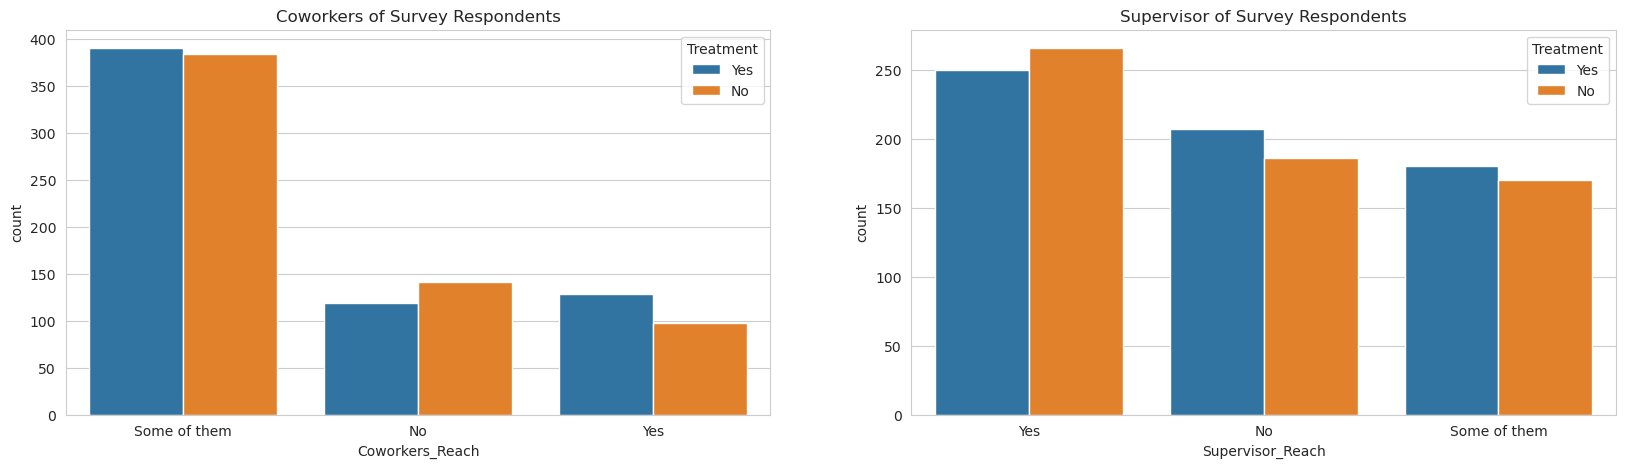

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = mhdata['Coworkers_Reach'], hue = mhdata['Treatment'])
plt.title('Coworkers of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Supervisor_Reach'], hue = mhdata['Treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

Interestingly, survey shows more positive response with regards to opening up to supervisors than to peers. Respondents who reveal openness to reach out to supervisors are more likely to not get treatment than otherwise. There is no specific pattern with respect to openness to share to coworkers.

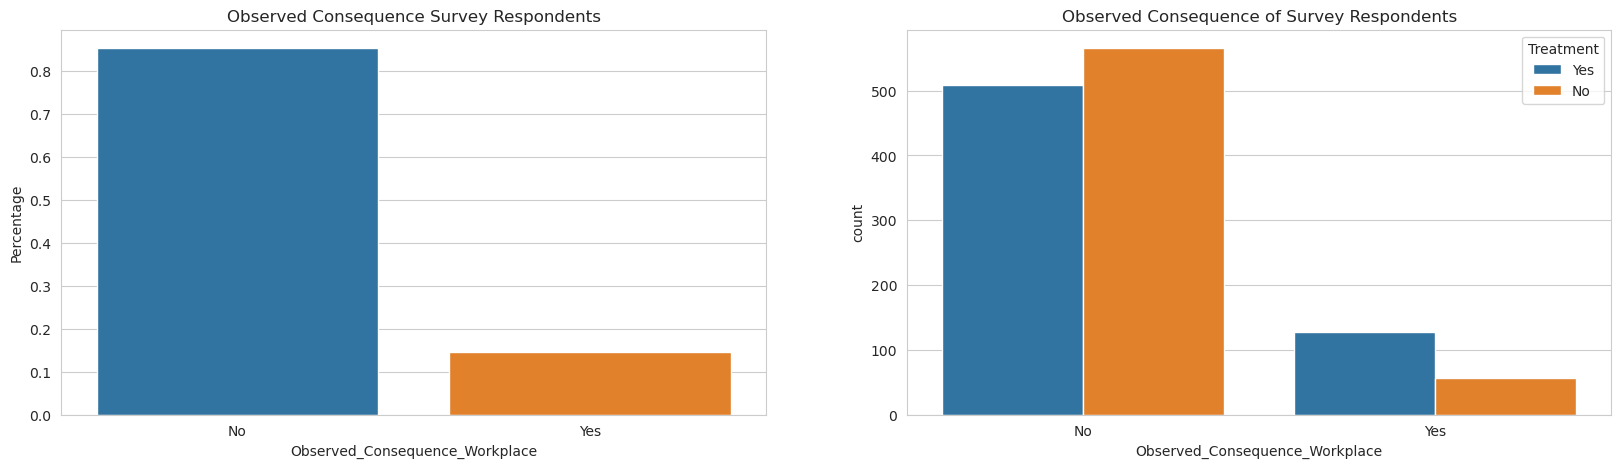

In [27]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Observed_Consequence_Workplace'].value_counts(normalize = True).rename_axis('Observed_Consequence_Workplace').reset_index(name = 'Percentage')
sns.barplot(x = 'Observed_Consequence_Workplace', y = 'Percentage', data = eda_percentage)
plt.title('Observed Consequence Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Observed_Consequence_Workplace'], hue = mhdata['Treatment'])
plt.title('Observed Consequence of Survey Respondents')
plt.show()

More than 80% respondent that they have not observed negative consequences from coworkers with mental health condition in the workplace. But respondents who say that they do observe negative consequences are more likely to seek medical treatment.

#### Workplace benefits, facilities, and confidentiality

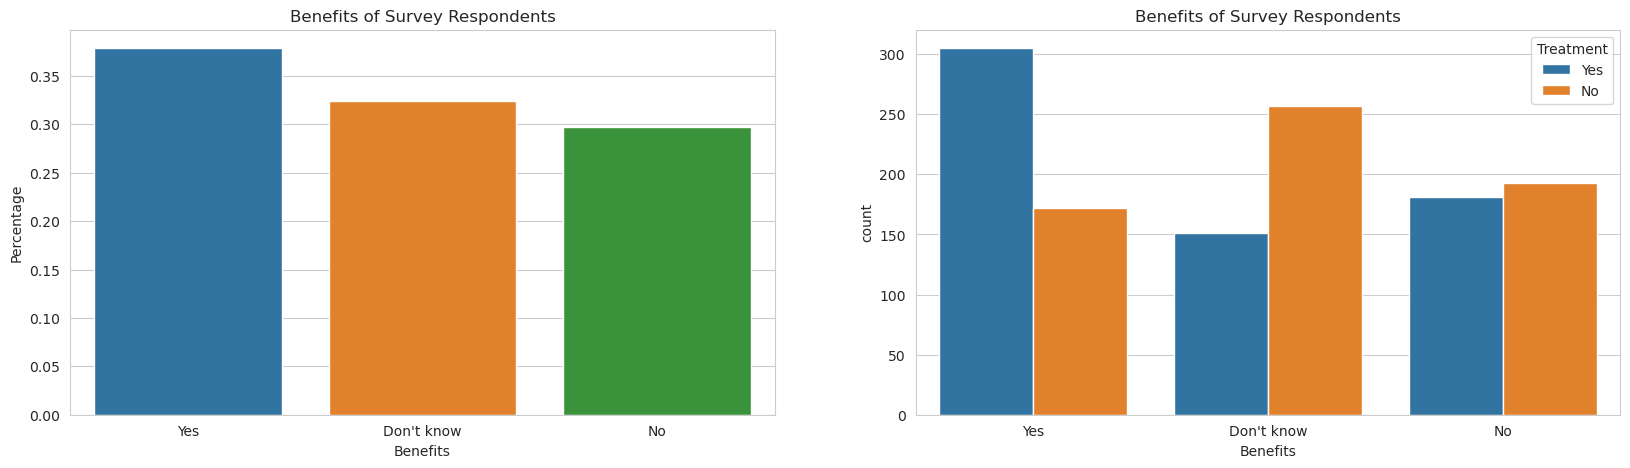

In [28]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Benefits'], hue = mhdata['Treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

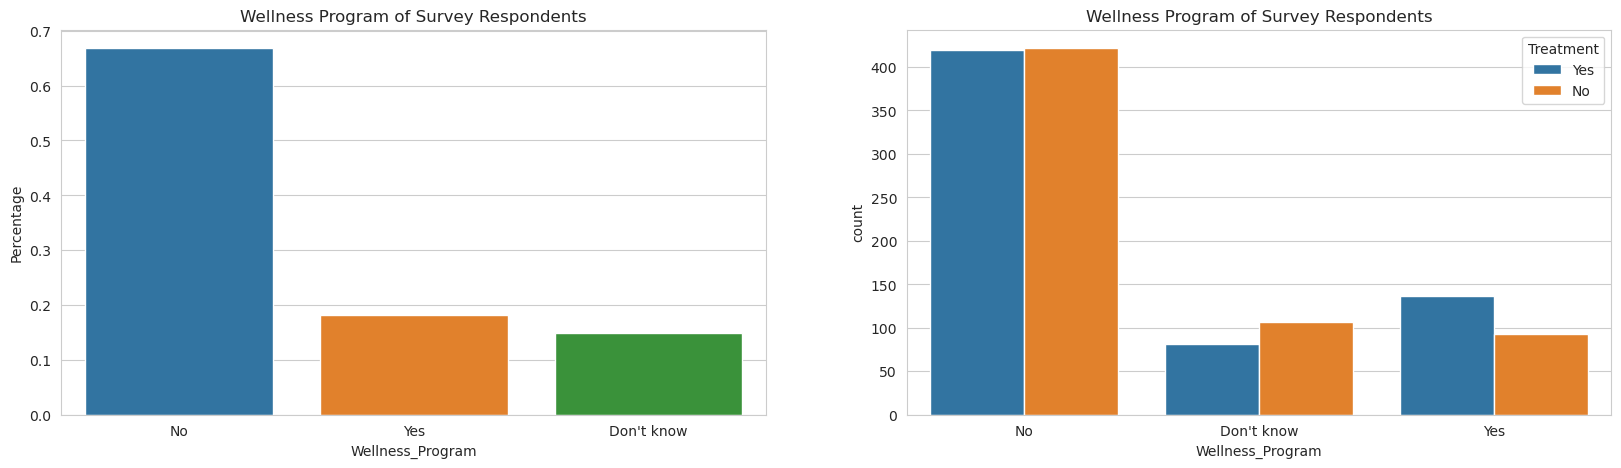

In [29]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Wellness_Program'].value_counts(normalize = True).rename_axis('Wellness_Program').reset_index(name = 'Percentage')
sns.barplot(x = 'Wellness_Program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Wellness_Program'], hue = mhdata['Treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

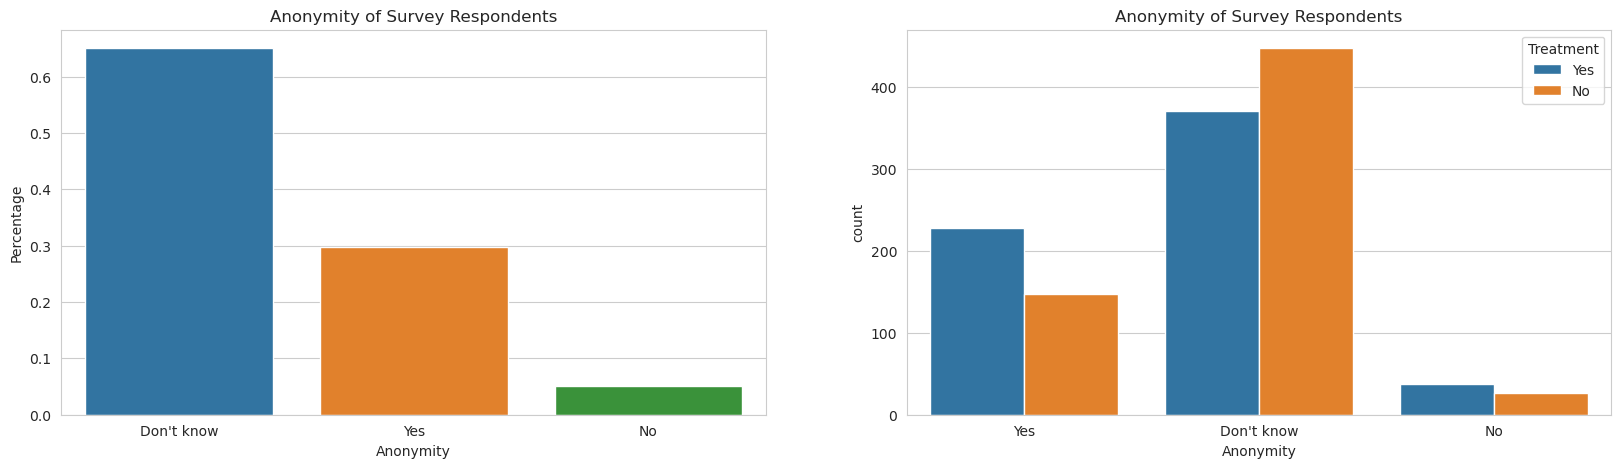

In [30]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Anonymity'].value_counts(normalize = True).rename_axis('Anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'Anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Anonymity'], hue = mhdata['Treatment'])
plt.title('Anonymity of Survey Respondents')
plt.show()

* It is revealed that only roughly 35% of the respondents are aware of the benefits present in their workplace and those who know are more likely to get medical treatment. The rest of the surveyees either are not aware of the said benefits or there non present. Those who responded otherwise are more likely to not get treatment than those who know the presence of the said benefits.
* Majority of the surveyees reveal the absence of wellness programs in the workplace.
* Majority of the respondents reveal that they are not aware if their identity is protected when consulting or assessing mental health in the workplace. This should not be taken lightly as those who responded that they are aware of the precautionary steps regarding their medical condition are more likely to seek medical condition than those who don't know.

### Data Pre-processing

In [31]:
mhdata['Treatment'] = np.where(mhdata['Treatment'] == 'Yes', 1, 0)

We now have converted the target variable into boolean values where: <br>

* 1 = Yes, to get medical treatment
* 2 = No, not getting any medical treatment

In [32]:
mhdata.sample(10)

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,Care_Options,Wellness_Program,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
174,34,Female,No,Yes,1,Sometimes,More than 1000,No,No,Yes,Yes,Yes,No,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,No,No
463,26,Female,No,Yes,0,Never,26-100,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat difficult,Maybe,Maybe,Some of them,No,No,Maybe,No,No
801,23,Male,No,Yes,1,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Very easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No
1092,32,Male,No,Yes,1,Often,100-500,No,Yes,No,Yes,No,No,Don't know,Very difficult,Yes,No,Yes,Yes,No,Yes,No,No
355,31,Male,No,No,1,Sometimes,500-1000,No,No,No,Yes,No,Don't know,Yes,Don't know,No,No,Some of them,No,No,No,No,No
1248,41,Female,No,Yes,1,Sometimes,26-100,No,Yes,Yes,No,No,Don't know,Don't know,Don't know,Yes,Maybe,No,No,No,No,Don't know,No
1167,34,Male,No,No,0,Never,More than 1000,Yes,Yes,Don't know,Not sure,No,No,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No
656,29,Male,No,No,0,Rarely,1-5,No,Yes,No,No,No,No,No,Somewhat difficult,No,Maybe,Some of them,No,No,No,Yes,No
715,31,Male,No,No,1,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
471,58,Male,No,No,1,Rarely,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No


In [33]:
# mhdata.to_csv('mhdata_clean.csv',index=False)

In [34]:
# Now, we separate our dependent and independent variables.
X = mhdata.drop(["Treatment"], axis=1)
Y = mhdata["Treatment"]

# The independent variables will be transformed into dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant. This is a requirement of Stats Model library. It creates a new column with float value 1
X = sm.add_constant(X)

In [35]:
# Let's see how X looks like with the dummy variables
X.head()

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1.0,37,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
1,1.0,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1.0,32,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,1.0,31,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
4,1.0,31,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [36]:
# checking the shape of our predictor for treatment
X.shape 

(1259, 45)

From 26 independent variables, replacing them with dummy variables expanded the columns to 45

In [37]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

## III. Logistic Regression Model

In [39]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                  881
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           44
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.4755
Time:                        09:21:58   Log-Likelihood:                -320.29
converged:                       True   LL-Null:                       -610.63
Covariance Type:            nonrobust   LLR p-value:                 8.885e-95
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.2152      0.901     -4.678      0.000      -5.981      -2.449
Age                                       0.0232  

#### At a glance, our Pseudo R-Sqaured is 0.4755 which indicates a moderately strong model fit. <br>

* The constant has the heaviest negative coefficient next to Seek_Help_Yes at -4.2152. This means that when all variables are 0 (default settings are: respondent is female, not self-employed, no family history, no work interference, 1-5 employees in the workplace, not working remotely, not a tech company, doesn't know benefits, no care options, doesn't know wellness program, doesn't know company assists in helping to seek help, doesn't know about anonymity of condition in the workplace, doesn't know how difficult to get medical leave, mental health consequence, physical health consequence, believes coworkers nor supervisors are not approachable with respect to medical health, may or may not consider opening topic about mental health or physical health in prospective interviews, and does not observe any negative consequences in the workplace) they are more likely to not get medical treatment for mental health
* Several predictor variables have significant coefficients, indicating that they have a statistically significant effect on the outcome variable. For instance, family history, work interference, and care options are positively related to the likelihood of receiving treatment. Work interference variable are the highest positive values among the variables. This indicates that when mental health interferes work more obviously, they are more likely to seek medical help.
* Having a family history of a mental health condition, awareness of the presence of benefits, care options, and anonymity in the workplace makes it more likely that the employee will seek medical help
* Interestingly, reaching out to coworkers may more likely prompt an employee to seek medical help; while reaching out to supervisors decreases the chance to seek medical help
* Gender variables are negative, meaning males and queers are more likely to avoid getting medical help than females

#### These are helpful variables should our prediction model focus on a continuous variable as a target variable, but we will be working on a classification model. So let's continue with the logistic regression model

### Setting Up a Confusion Matrix

In [40]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

### Check model performance on training and test set

Checking model performance on train set:


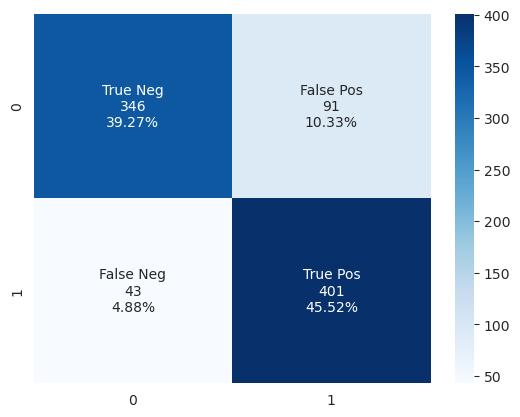

In [41]:
print("Checking model performance on train set:")
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.5)

In [42]:
print("Training performance:")
model_performance_classification(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8479,0.903153,0.815041,0.856838


Checking model performance on test set:


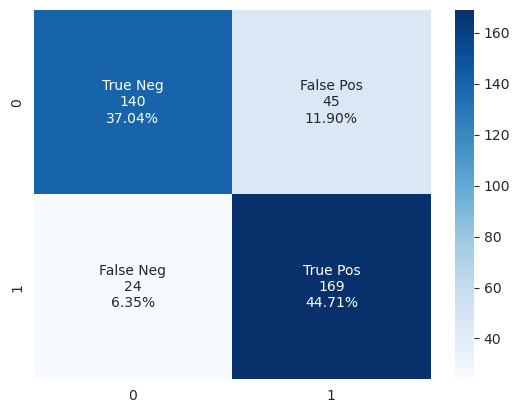

In [43]:
print("Checking model performance on test set:")
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=0.5)

In [44]:
print("Test performance:")
logistic_regression_perf = model_performance_classification(lg, X_test, y_test)
logistic_regression_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81746,0.875648,0.78972,0.830467


We can observe that the model is good <br>

* The model is able to detect 87% of employees likely needing treatment
* The model's prediction of treatment is true 78% of the time
* F1 score is 83% which is balanced

### Defining the Matrix
We observe that our model is not under or overfitting and the model is good. <br>

* True Negative: Employee's actual mental health needs no treatment and the prediction is no treatment needed
* True Positive: Employee's actual mental health needs treatment and the prediction is treatment needed
* False Negative: Employee's actual mental health needs treatment and the prediction is no treatment needed
* False Positive: Employee's actual mental health needs no treatment and the prediction is treatment needed

#### The model may make two wrong predictions:
* Predicting that the employee needs medical treatment for mental health, but the employee is actually fine (FP)
* Predicting that the employee doesn't need medical treatment for mental health, but the employee actually needs treatment (FN)

#### Which is more important? As mental health is linked to burnout and stress in the workplace, we aim to avoid a higher FN as much as we can, meaning we want to avoid missing individuals who actually need treatment. Thus a high recall is ideal.

### Utilizing ROC-AUC to determine the skill of our model

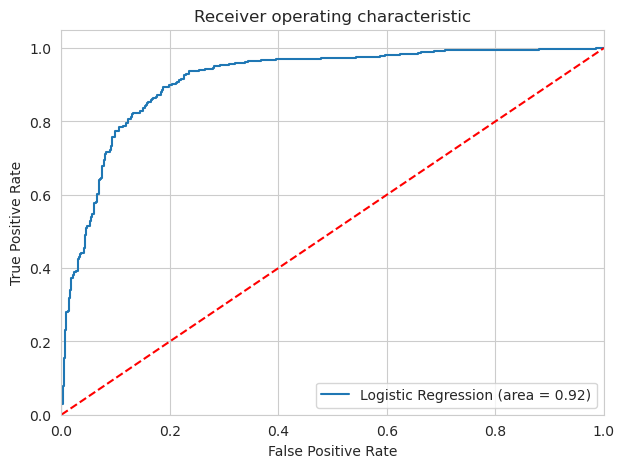

In [45]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Our model is very skilled! Compared to the unskilled model (red line) our skilled model (blue line) is very strong

### Finding the balanced threshold using the Precision-Recal Curve

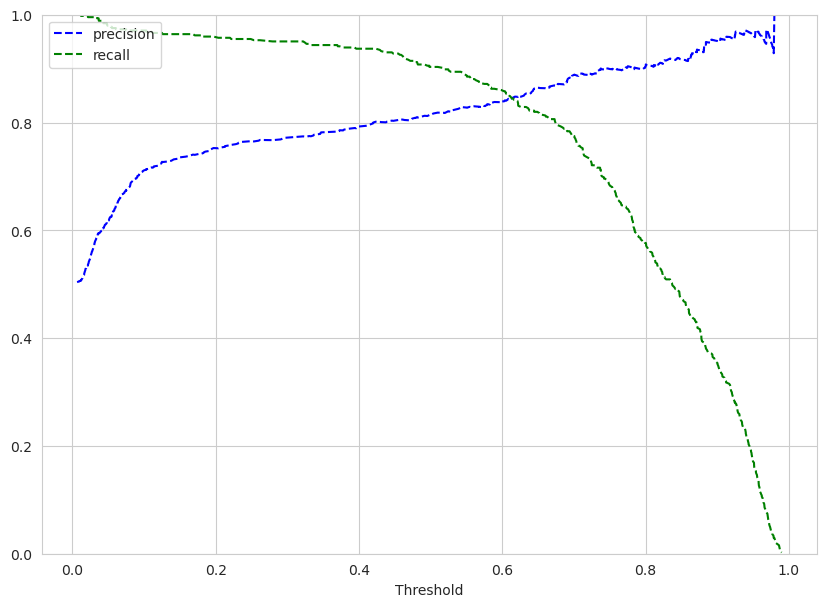

In [46]:
# Finding the balanced threshold
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_threshold(prec, rec, tre)
plt.show()

It looks like a balanced threshold is somewhere around 0.63. Let's redo our results

In [47]:
print("Training performance:")
model_performance_classification(lg, X_train, y_train, threshold=0.63)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839955,0.828829,0.849885,0.839225


Our precision has increased! But our recall has decreased. As we mentioned earlier, in this case we want to prioritize minimizing FN, and thus should have a high recall. Thus, let us decrease threshold and see our results.

## IV. Tuned Logistic Regression

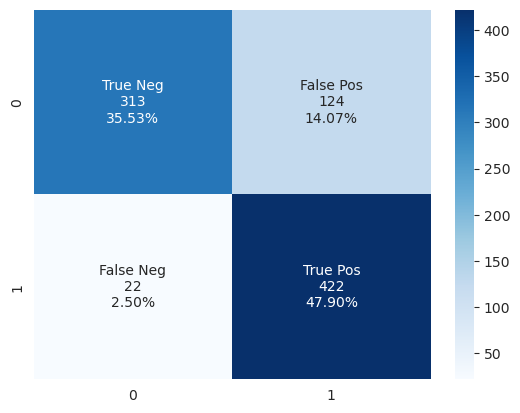

In [48]:
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.3)

In [49]:
log_reg_model_train_perf_threshold_curve = model_performance_classification(
    lg, X_train, y_train, threshold=0.3
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve


Training performance:


,Accuracy,Recall,Precision,F1
0,0.834279,0.95045,0.772894,0.852525


Checking model performance on test set:


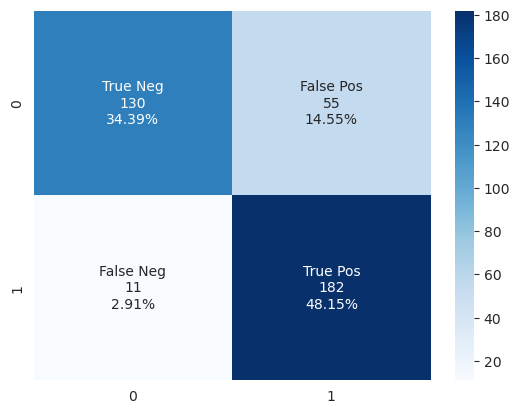

In [50]:
print("Checking model performance on test set:")
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=0.3)

In [51]:
print("Test performance:")
logistic_regression_tuned = model_performance_classification(lg, X_test, y_test, threshold=0.3)
logistic_regression_tuned

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825397,0.943005,0.767932,0.846512


This is ideal for our model. A high recall and still a decent precision, and a balanced F1. Let's try a decision tree model this time.

## V. Decision Tree Model

In [52]:
# Decision Tree Modeling
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
dTree_model_train_perf = model_performance_classification(
    dTree, X_train, y_train
)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719577  0.709845    0.73262  0.721053


#### **An overfitted model!** Let's try to fix this.

In [54]:
# function to create Confusion matrix
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

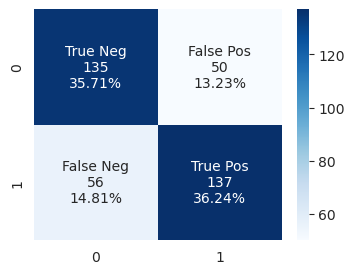

In [55]:
# Creating confusion matrix
create_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

In [56]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Gender_Male', 'Gender_Queer', 'Self_Employed_Yes', 'Family_History_Yes', 'Work_Interfere_Often', 'Work_Interfere_Rarely', 'Work_Interfere_Sometimes', 'Employee_Count_Company_100-500', 'Employee_Count_Company_26-100', 'Employee_Count_Company_500-1000', 'Employee_Count_Company_6-25', 'Employee_Count_Company_More than 1000', 'Remote_Work_Yes', 'Tech_Company_Yes', 'Benefits_No', 'Benefits_Yes', 'Care_Options_Not sure', 'Care_Options_Yes', 'Wellness_Program_No', 'Wellness_Program_Yes', 'Seek_Help_No', 'Seek_Help_Yes', 'Anonymity_No', 'Anonymity_Yes', 'Medical_Leave_Somewhat difficult', 'Medical_Leave_Somewhat easy', 'Medical_Leave_Very difficult', 'Medical_Leave_Very easy', 'Mental_Health_Consequence_No', 'Mental_Health_Consequence_Yes', 'Physical_Health_Consequence_No', 'Physical_Health_Consequence_Yes', 'Coworkers_Reach_Some of them', 'Coworkers_Reach_Yes', 'Supervisor_Reach_Some of them', 'Supervisor_Reach_Yes', 'Mental_Health_Interview_No', 'Mental_Health_Interview_Yes

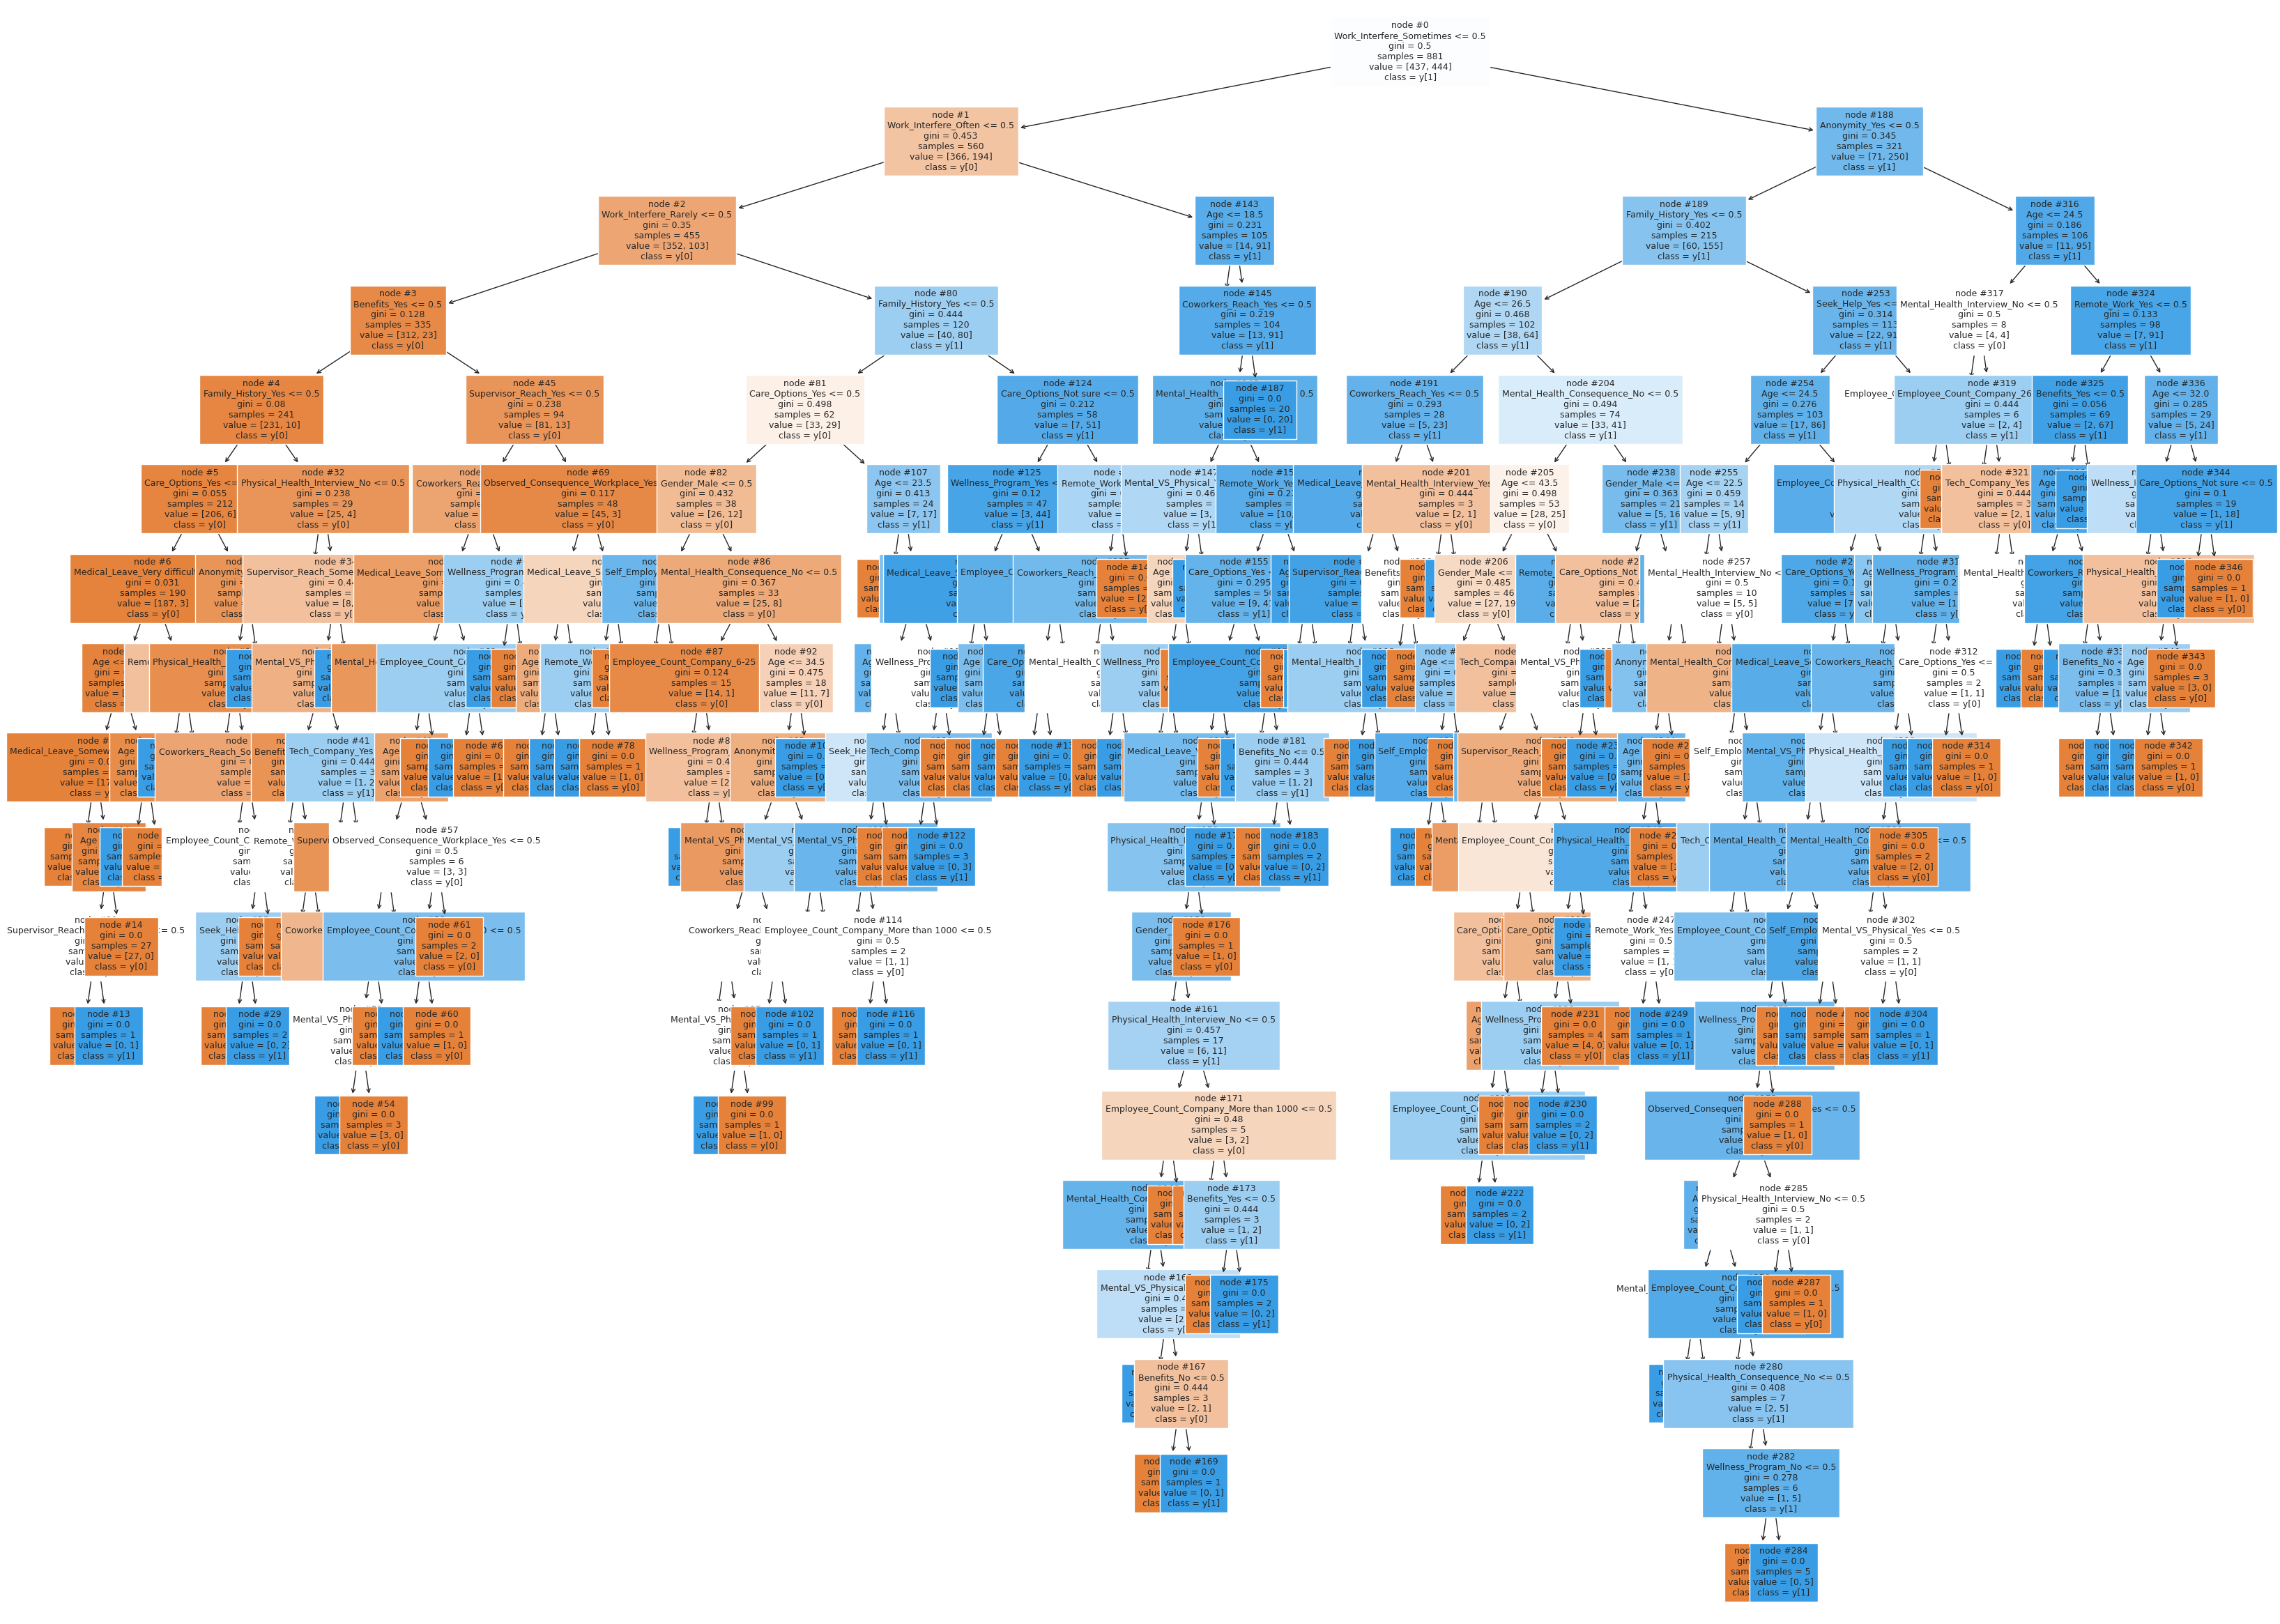

In [57]:
plt.figure(figsize=(40, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

 #### The decision tree model is very robust and hard to identify so a text version will be called

In [58]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |   |--- Care_Options_Yes <= 0.50
|   |   |   |   |   |   |--- Medical_Leave_Very difficult <= 0.50
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy >  0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- Supervisor_Reach_Some of them <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Supervisor_Reach_Some of them >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |   |--- cl

We have a lot of variables so this is really hard to decipher.

In [59]:
# Printing feature importances
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Work_Interfere_Sometimes               0.173211
Work_Interfere_Often                   0.158811
Work_Interfere_Rarely                  0.143464
Age                                    0.102872
Family_History_Yes                     0.032140
Care_Options_Yes                       0.029858
Wellness_Program_No                    0.022249
Remote_Work_Yes                        0.020174
Mental_VS_Physical_No                  0.020010
Tech_Company_Yes                       0.018228
Physical_Health_Interview_No           0.017880
Mental_Health_Interview_No             0.017407
Gender_Male                            0.016630
Benefits_No                            0.015703
Employee_Count_Company_26-100          0.015643
Mental_Health_Consequence_Yes          0.013898
Self_Employed_Yes                      0.013281
Coworkers_Reach_Some of them           0.013153
Anonymity_Yes                          0.012630
Seek_Help_Yes                          0

We can see that work interference, age, family history, care options, and wellness program are the most important features of the model.

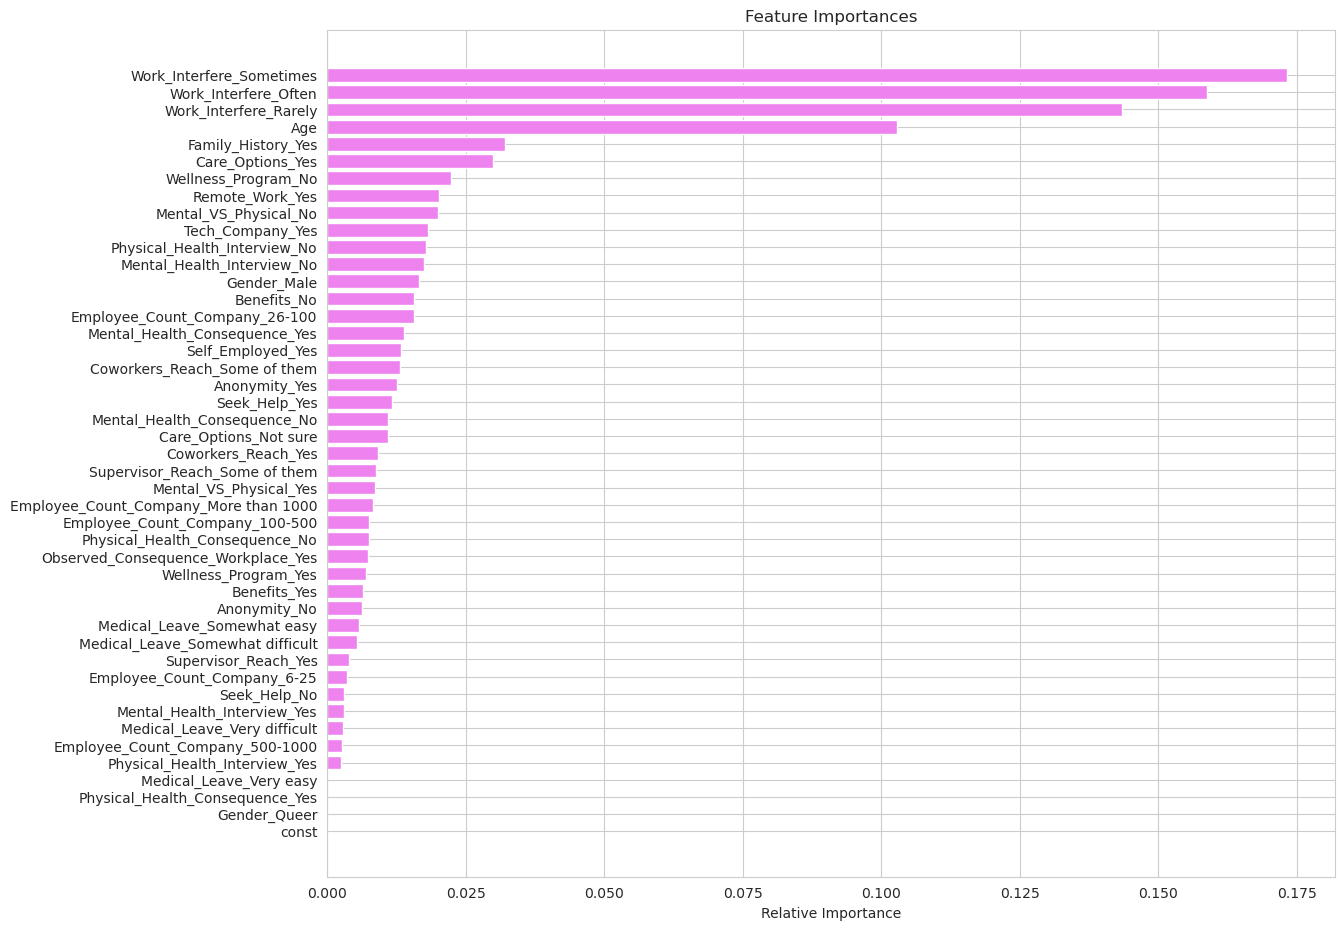

In [60]:
# Loading feature importance in a graph to get a better understanding
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(13, 11))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## VI. Tuned Decision Tree Model

### Reducing the overfitting problem

In [61]:
# Let's reduce our depth to 4, the previous decision tree model looked too overwhelming
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

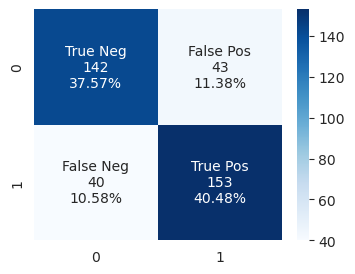

In [62]:
create_confusion_matrix(dTree_short, X_test, y_test, figsize=(4, 3))

In [63]:
# Calculating different metrics
dTree_short_model_train_perf = model_performance_classification(
    dTree_short, X_train, y_train
)
print("Training performance:\n", dTree_short_model_train_perf)
dTree_short_model_test_perf = model_performance_classification(dTree_short, X_test, y_test)
print("Testing performance:\n", dTree_short_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839955  0.871622   0.821656  0.845902
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.780423  0.792746   0.780612  0.786632


#### We were able to solve the overfitting model but the results show poorer performance than our logistic regression. This model is not that good

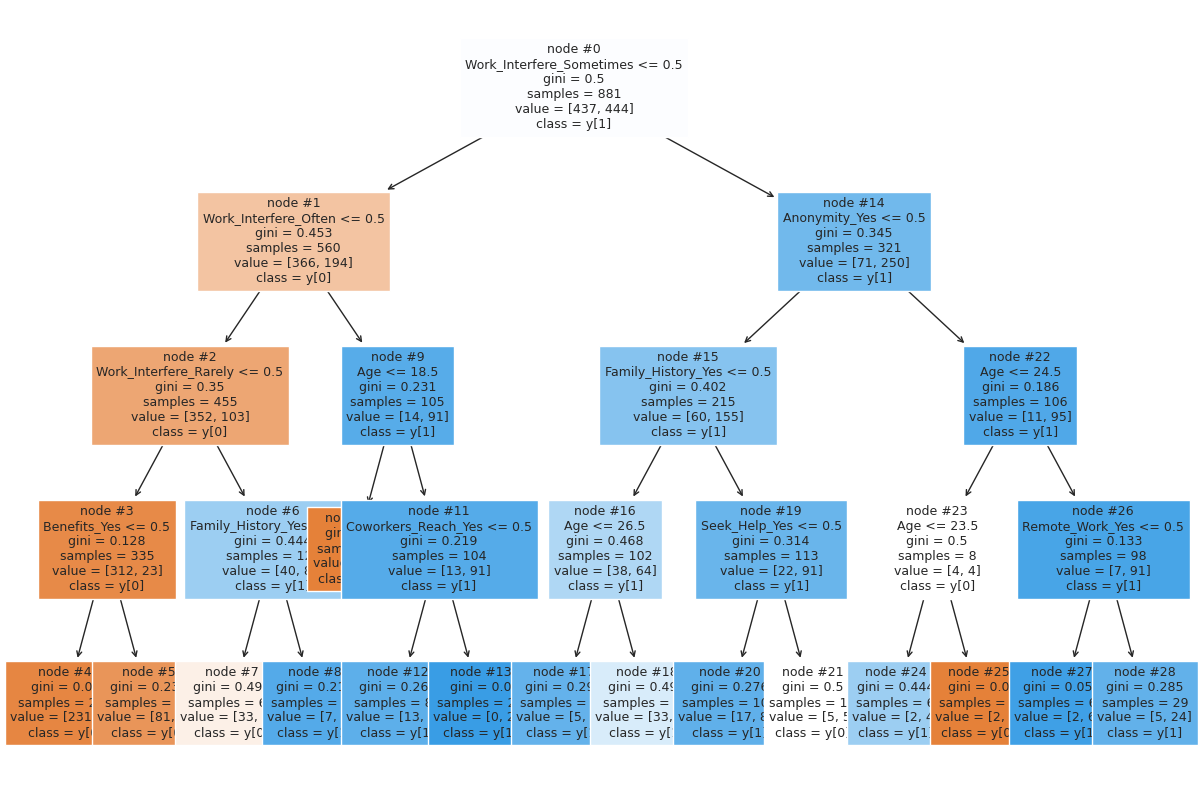

In [64]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree_short,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [65]:
print(tree.export_text(dTree_short, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Benefits_Yes >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Work_Interfere_Rarely >  0.50
|   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Family_History_Yes >  0.50
|   |   |   |   |--- class: 1
|   |--- Work_Interfere_Often >  0.50
|   |   |--- Age <= 18.50
|   |   |   |--- class: 0
|   |   |--- Age >  18.50
|   |   |   |--- Coworkers_Reach_Yes <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Coworkers_Reach_Yes >  0.50
|   |   |   |   |--- class: 1
|--- Work_Interfere_Sometimes >  0.50
|   |--- Anonymity_Yes <= 0.50
|   |   |--- Family_History_Yes <= 0.50
|   |   |   |--- Age <= 26.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  26.50
|   |   |   |   |--- class: 1
|   |   |--- Family_History_Yes >  0.50
|   |   |   |--- Se

## VII. Testing and Conclusion

Let's test our models using a hypothetical employee

In [66]:
new_respondent = pd.DataFrame([{
    'const': 1,                                 
    'Age': 27,                                      
    'Gender_Male': 0,                              
    'Gender_Queer': 0,                            
    'Self_Employed_Yes': 0,                      
    'Family_History_Yes': 1,                     
    'Work_Interfere_Often': 0,                     
    'Work_Interfere_Rarely': 0,                    
    'Work_Interfere_Sometimes': 1,            
    'Employee_Count_Company_100-500': 0,          
    'Employee_Count_Company_26-100': 1,             
    'Employee_Count_Company_500-1000': 0,           
    'Employee_Count_Company_6-25': 0,              
    'Employee_Count_Company_More than 1000': 0,     
    'Remote_Work_Yes': 1,                          
    'Tech_Company_Yes': 1,                        
    'Benefits_No': 0,                              
    'Benefits_Yes': 1,                            
    'Care_Options_Not sure': 0,                  
    'Care_Options_Yes': 1,                        
    'Wellness_Program_No': 1,                      
    'Wellness_Program_Yes': 0,                   
    'Seek_Help_No': 0,                          
    'Seek_Help_Yes': 1,                       
    'Anonymity_No': 0,                    
    'Anonymity_Yes': 1,                        
    'Medical_Leave_Somewhat difficult': 0,         
    'Medical_Leave_Somewhat easy': 0,             
    'Medical_Leave_Very difficult': 0,         
    'Medical_Leave_Very easy': 1,                
    'Mental_Health_Consequence_No': 0,           
    'Mental_Health_Consequence_Yes': 0,         
    'Physical_Health_Consequence_No': 0,          
    'Physical_Health_Consequence_Yes': 0,        
    'Coworkers_Reach_Some of them': 0,            
    'Coworkers_Reach_Yes': 1,                     
    'Supervisor_Reach_Some of them': 0,           
    'Supervisor_Reach_Yes': 0,                     
    'Mental_Health_Interview_No': 0,               
    'Mental_Health_Interview_Yes': 0,              
    'Physical_Health_Interview_No': 0,             
    'Physical_Health_Interview_Yes': 0,             
    'Mental_VS_Physical_No': 0,                    
    'Mental_VS_Physical_Yes': 1,                   
    'Observed_Consequence_Workplace_Yes': 0,

    
}],columns=[
    'const',                                 
    'Age',                                      
    'Gender_Male',                              
    'Gender_Queer',                           
    'Self_Employed_Yes',                      
    'Family_History_Yes',                     
    'Work_Interfere_Often',                     
    'Work_Interfere_Rarely',                    
    'Work_Interfere_Sometimes',            
    'Employee_Count_Company_100-500',          
    'Employee_Count_Company_26-100',             
    'Employee_Count_Company_500-1000',           
    'Employee_Count_Company_6-25',              
    'Employee_Count_Company_More than 1000',     
    'Remote_Work_Yes',                         
    'Tech_Company_Yes',                        
    'Benefits_No',                              
    'Benefits_Yes',                            
    'Care_Options_Not sure',                  
    'Care_Options_Yes',                       
    'Wellness_Program_No',                     
    'Wellness_Program_Yes',                   
    'Seek_Help_No',                          
    'Seek_Help_Yes',                       
    'Anonymity_No',                    
    'Anonymity_Yes',                        
    'Medical_Leave_Somewhat difficult',         
    'Medical_Leave_Somewhat easy',             
    'Medical_Leave_Very difficult',         
    'Medical_Leave_Very easy',                
    'Mental_Health_Consequence_No',           
    'Mental_Health_Consequence_Yes',          
    'Physical_Health_Consequence_No',          
    'Physical_Health_Consequence_Yes',        
    'Coworkers_Reach_Some of them',            
    'Coworkers_Reach_Yes',                     
    'Supervisor_Reach_Some of them',           
    'Supervisor_Reach_Yes',                     
    'Mental_Health_Interview_No',               
    'Mental_Health_Interview_Yes',              
    'Physical_Health_Interview_No',             
    'Physical_Health_Interview_Yes',             
    'Mental_VS_Physical_No',                    
    'Mental_VS_Physical_Yes',                   
    'Observed_Consequence_Workplace_Yes',],)
new_respondent

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1,27,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [67]:
predictionlg = lg.predict(new_respondent)
print('Prediction:', round(predictionlg[0]))

Prediction: 1


In [68]:
predictiondt = dTree.predict(new_respondent)
print('Prediction:', round(predictiondt[0]))

Prediction: 1


In [69]:
predictiondts = dTree_short.predict(new_respondent)
print('Prediction:', round(predictiondts[0]))

Prediction: 1


Testing all of our models, this sample respondent is identified as "yes, needs treatment"

### Comparing the models

In [70]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf.T,
        logistic_regression_tuned.T,
        dTree_model_test_perf.T,
        dTree_short_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
   
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Logistic Regression Tuned,Decision Tree,Decision Tree Tuned
Accuracy,0.817460,0.825397,0.719577,0.780423
Recall,0.875648,0.943005,0.709845,0.792746
Precision,0.789720,0.767932,0.732620,0.780612
F1,0.830467,0.846512,0.721053,0.786632


The logistic regression tuned model is more ideal: Has the highest accuracy, recall, and F1 among the four models generated. We would like to reiterate that for this subject we want as many employees to be identified needing treatment so we want a high recall.